In [591]:
import networkx as nx
import pandas as pd
import numpy as np
import ctypes
import matplotlib.colors as clr
import matplotlib.pyplot as plt

In [592]:

G = nx.read_edgelist("../social_networks/social_network.edgelist", encoding='utf-8', nodetype=int)
#G = nx.convert_node_labels_to_integers(G, first_label=1, ordering="sorted")

In [593]:
df = pd.read_csv("../social_networks/social_network.struc2vec", skiprows=1, sep=' ', header=None, index_col=0).sort_index()
df_train = pd.read_csv("../social_networks/social_network.train", sep=' ', header=None, index_col=0).sort_index()

u_ids = [i for i in df.index if i not in df_train.index]
c_ids = [j for j in df_train[df_train[1] == 1].index]
f_ids = [j for j in df_train[df_train[1] == 0].index]

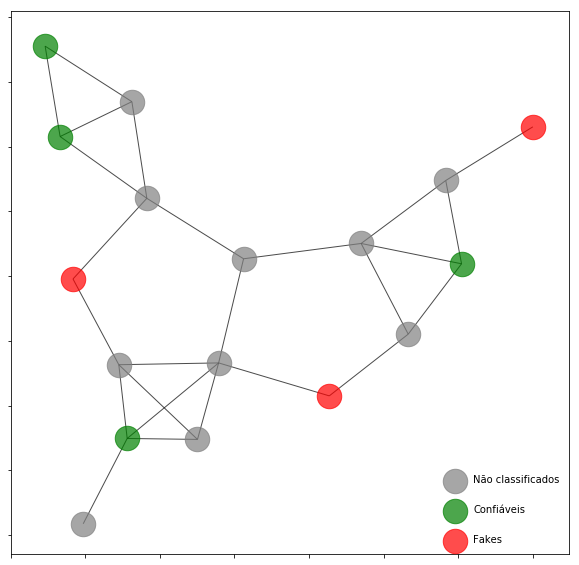

In [594]:

fig, ax1 = plt.subplots(1,1,figsize=(10,10))
#x.draw_kamada_kawai(G,node_color = color_map, label = 'a')
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G,node_size=600, alpha=0.7, pos=pos, nodelist=u_ids,node_color='grey', label=u'Não classificados')
nx.draw_networkx_nodes(G,node_size=600, alpha=0.7, pos=pos, nodelist=c_ids,node_color='green', label=u'Confiáveis')
nx.draw_networkx_nodes(G,node_size=600, alpha=0.7, pos=pos, nodelist=f_ids,node_color='red', label='Fakes')
nx.draw_networkx_edges(G, alpha=0.7, pos=pos)
ax1.legend(labelspacing=2, loc='lower right', frameon=False)
ax1.set_yticklabels([])
ax1.set_xticklabels([])
plt.show()

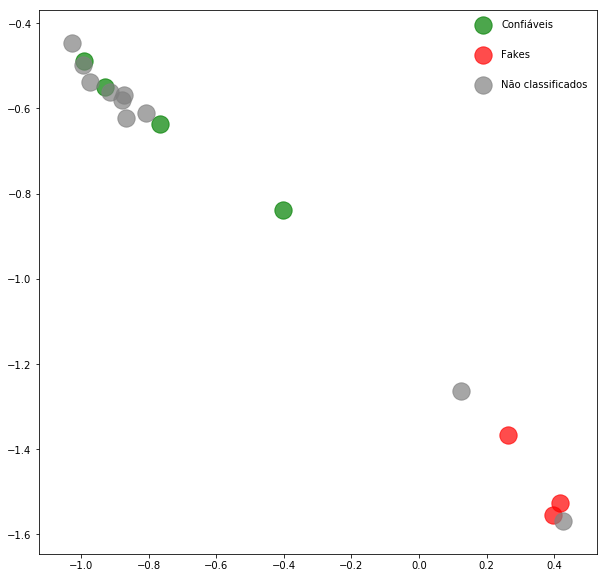

In [595]:
fig, ax1 = plt.subplots(1,1,figsize=(10,10))

groups = np.where(np.isin(df.index, u_ids), 3, np.where(np.isin(df.index, c_ids), 1, 2 ) )
labels= {1: u'Confiáveis', 2: 'Fakes', 3: u'Não classificados'}
cdict = {1: 'green', 2: 'red', 3: 'gray'}
for g in np.unique(groups):
    ix = df[groups == g].index
    ax1.scatter(df.loc[ix,1], df.loc[ix, 2], c = cdict[g], label = labels[g], s = 300, alpha=0.7)
# ax1.scatter(df[1][df_train[df_train[1] == 1].index], df[2][df_train[df_train[1] == 1].index], c='green', s=300)
# ax1.scatte r(df[1][df_train[df_train[1] == 0].index], df[2][df_train[df_train[1] == 0].index], c='red', s=300)
# ax1.scatter(df.loc[[i for i in df.index if i not in df_train.index], 1], df.loc[[i for i in df.index if i not in df_train.index], 2], c='gray', s=300)
ax1.legend(labelspacing=2, loc='upper right', frameon=False)
plt.show()

In [596]:
#training

In [597]:
df_train.columns = ['confiavel']

In [598]:
df_train = pd.concat([df, df_train], axis=1, join='inner')

In [599]:
y = df_train.loc[:, 'confiavel'].values
X = df_train.drop(['confiavel'], axis=1)

In [600]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, class_weight='balanced').fit(X,y)

In [601]:
y_pred_proba = lr.predict_proba(df)

In [602]:
threshold = 0.5
y_pred = np.where(y_pred_proba.T[1] > threshold, 1, 0)

In [603]:
c_ids = [j for j in df[y_pred == 1].index]
f_ids = [j for j in df[y_pred == 0].index]

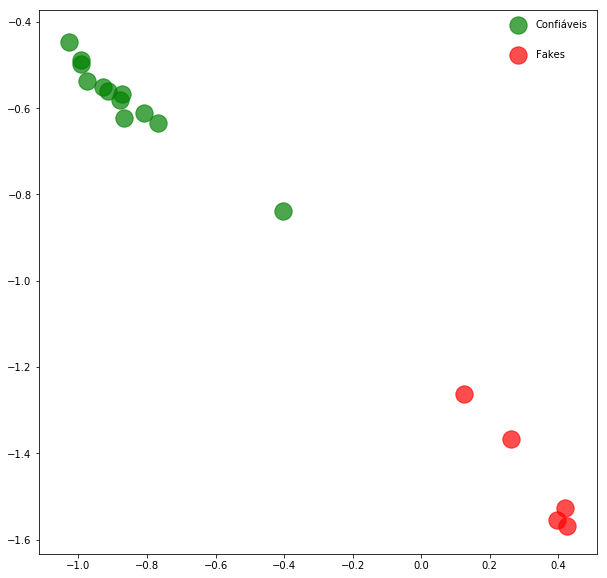

In [604]:
labels= {1: u'Confiáveis', 2: 'Fakes'}
cdict = {1: 'green', 2: 'red'}
groups = np.where(np.isin(df.index, c_ids), 1, 2 )
fig, ax1 = plt.subplots(figsize=(10,10))
#fig.suptitle(u'Classificação de nós por Regressão Logística', fontsize=16)
for g in np.unique(groups):
    ix = df[groups == g].index
    ax1.scatter(df.loc[ix,1], df.loc[ix, 2], c = cdict[g], label = labels[g], s = 300, alpha=0.7)
ax1.legend(labelspacing=2, loc='upper right', frameon=False)

plt.show()


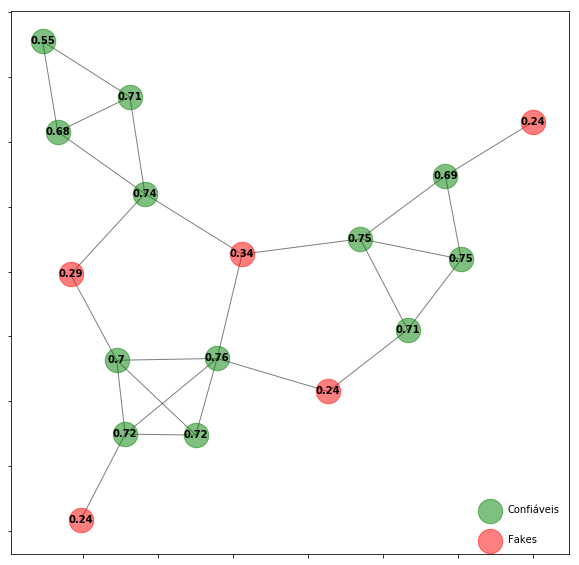

In [605]:
fig, ax1 = plt.subplots(figsize=(10,10))
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G,pos=pos, labels={k+1:round(v[1],2) for k,v in enumerate(y_pred_proba)}, font_size=10, font_weight='bold')
nx.draw_networkx_nodes(G, node_size=600, alpha=0.5, pos=pos, nodelist=c_ids,node_color='green', label=u'Confiáveis')
nx.draw_networkx_nodes(G, node_size=600, alpha=0.5, pos=pos, nodelist=f_ids,node_color='red', label='Fakes')
nx.draw_networkx_edges(G, alpha=0.5, pos=pos)
ax1.legend(labelspacing=2, loc='lower right', frameon=False)
ax1.set_yticklabels([])
ax1.set_xticklabels([])


plt.show()

In [606]:
cmap = clr.LinearSegmentedColormap.from_list('custom blue', 
                                             [(0,    '#ff0000'),
                                              (1, '#00ff00')], N=256)

[]

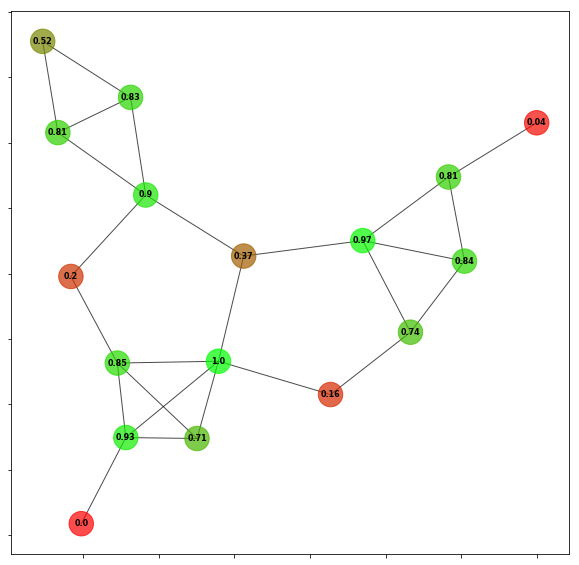

In [607]:
result = pd.read_csv("../social_networks/social_network.realrank", sep=' ', header=None, index_col=0).sort_index()
fig, ax1 = plt.subplots(figsize=(10,10))
#fig.suptitle(u'Resultados após propagação por SybilRank', fontsize=16)
pos=nx.kamada_kawai_layout(G)
node_color = result.to_dict()[1]
nx.draw_networkx_labels(G,pos=pos, labels={k+1:round(v,2) for k,v in enumerate(result.values.ravel().T)}, font_size=8, font_weight='bold')
nx.draw_networkx_nodes(G,node_size=600, alpha=0.7, cmap=cmap, pos=pos, vmin=0, vmax=1, node_color=[v for k,v in node_color.items()])
nx.draw_networkx_edges(G,node_size=600, alpha=0.7, pos=pos)
ax1.legend(labelspacing=2, loc='lower right', frameon=False)
ax1.set_yticklabels([])
ax1.set_xticklabels([])


In [ ]:
#plt redes

result = pd.read_csv("../social_networks/rede_common.realrank", sep=' ', header=None, index_col=0).sort_index()
fig, ax1 = plt.subplots(figsize=(10,10))
pos=nx.kamada_kawai_layout(G)
node_color = result.to_dict()[1]
nx.draw_networkx_labels(G,pos=pos, labels={k+1:round(v,2) for k,v in enumerate(result.values.ravel().T)}, font_size=8, font_weight='bold')
nx.draw_networkx_nodes(G,node_size=600, alpha=0.7, cmap=cmap, pos=pos, vmin=0, vmax=1, node_color=[v for k,v in node_color.items()])
nx.draw_networkx_edges(G,node_size=600, alpha=0.7, pos=pos)
ax1.legend(labelspacing=2, loc='lower right', frameon=False)
ax1.set_yticklabels([])
ax1.set_xticklabels([])
